In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Load Dataset & Split Features
# Load dataset
df = pd.read_csv("cleaned_hip_replacement_data.csv")

In [12]:
df.head()

,operating_certificate_number,facility_id,zip_code_3_digits,length_of_stay,type_of_admission,patient_disposition,discharge_year,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,...,health_service_area_finger lakes,health_service_area_hudson valley,health_service_area_long island,health_service_area_new york city,health_service_area_southern tier,health_service_area_western ny,age_group_18 to 29,age_group_30 to 49,age_group_50 to 69,age_group_70 or older
0,228000,39,148,4.5,elective,hosp basd medicare approved swing bed,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,False,True
1,228000,39,148,4.0,elective,home or self care,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,True,False
2,228000,39,147,3.0,elective,home or self care,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,True,False
3,228000,39,147,3.0,elective,hosp basd medicare approved swing bed,2016,203,osteoarthritis,153,...,False,False,False,False,False,True,False,False,True,False
4,228000,39,148,2.0,elective,home or self care,2016,237,complication of device; implant or graft,153,...,False,False,False,False,False,True,False,False,True,False


In [13]:
# Target and features
X = df.drop(columns=["length_of_stay"])
y = df["length_of_stay"]

In [14]:
# Identify Categorical & Numerical Columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
# Identify column types
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['zip_code_3_digits', 'type_of_admission', 'patient_disposition', 'ccs_diagnosis_description', 'ccs_procedure_description', 'apr_drg_description', 'apr_mdc_description', 'apr_severity_of_illness_description', 'apr_risk_of_mortality', 'apr_medical_surgical_description', 'gender_m', 'race_multi-racial', 'race_other race', 'race_white', 'ethnicity_not span/hispanic', 'ethnicity_spanish/hispanic', 'ethnicity_unknown', 'facility_name_albany medical center hospital', 'facility_name_alice hyde medical center', 'facility_name_arnot ogden medical center', 'facility_name_auburn memorial hospital', 'facility_name_aurelia osborn fox memorial hospital', 'facility_name_bellevue hospital center', 'facility_name_bon secours community hospital', 'facility_name_bronx-lebanon hospital center - concourse division', 'facility_name_brookdale hospital medical center', 'facility_name_brookhaven memorial hospital medical center inc', 'facility_name_brooklyn hospital center - downtown campu

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (21275, 241)
Testing size: (5319, 241)


In [20]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [21]:
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train_processed, y_train)

y_pred_base = rf_base.predict(X_test_processed)

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_base))
mae = mean_absolute_error(y_test, y_pred_base)
r2 = r2_score(y_test, y_pred_base)

print("Baseline Random Forest Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")

Baseline Random Forest Performance:
RMSE: 0.03
MAE : 0.01
R²  : 0.999


In [ ]:
# Hyperparameter Tuning
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    random_state=42
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_

print("Best Parameters:", rf_random.best_params_)


In [23]:
# Hyperparameter Grid
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

In [24]:
# Random Forest Model
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

In [25]:
# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [26]:
# Fit Tuned Model
rf_random.fit(X_train_processed, y_train)

best_rf = rf_random.best_estimator_

print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [27]:
# Predictions
y_pred = best_rf.predict(X_test_processed)

In [28]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")

Tuned Random Forest Performance:
RMSE: 0.43
MAE : 0.29
R²  : 0.834


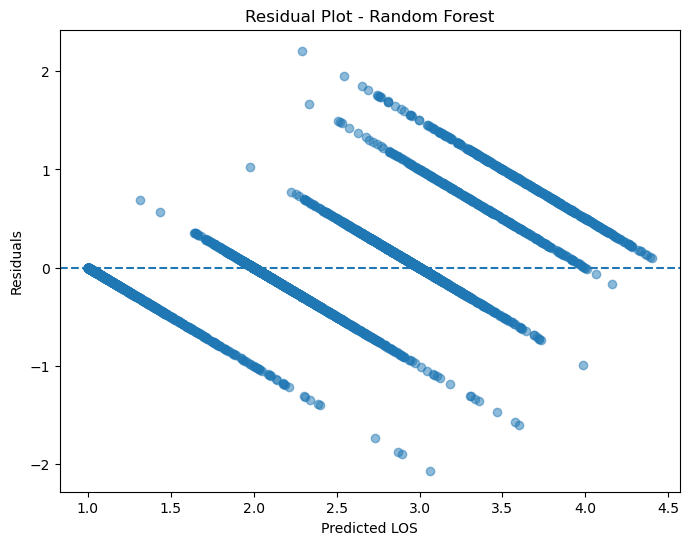

In [29]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted LOS")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.show()

In [ ]:
"""

What residuals mean

Residual = Actual LOS – Predicted LOS
Residual = 0 → Perfect prediction
Positive residual → Model under-predicted LOS
Negative residual → Model over-predicted LOS

What we see in Residual Plot

Residuals are mostly centered around zero, which is good
No clear curve or pattern → model is not biased
Slight spread increases for higher predicted LOS →
means longer hospital stays are harder to predict precisely
Diagonal band pattern appears because LOS values are discrete


The residual plot shows that most prediction errors are centered 
around zero, indicating the model is well-calibrated and unbiased. 
Slightly higher variance for longer stays suggests some complexity 
in predicting extended hospital stays, but overall the error 
distribution is stable.

"""

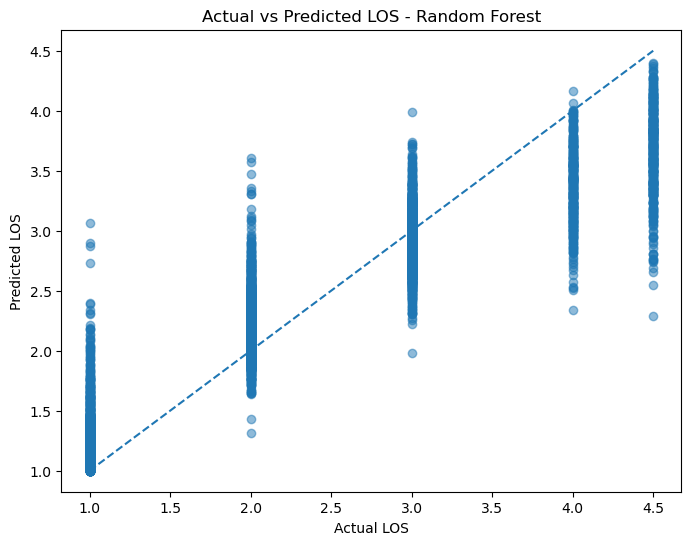

In [30]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.title("Actual vs Predicted LOS - Random Forest")
plt.show()

In [ ]:
"""
What this plot tells

X-axis → Actual LOS
Y-axis → Predicted LOS
Dashed line → Perfect prediction line

Observations

Most points lie close to the diagonal
Shows strong agreement between actual and predicted LOS
Small vertical spread → acceptable prediction error
Slight under/over-prediction at extreme values (normal in healthcare data)


“The actual vs predicted plot shows strong alignment with the ideal 
prediction line, meaning the Random Forest model is accurately capturing 
the relationship between patient and hospital features and length of stay.”

"""

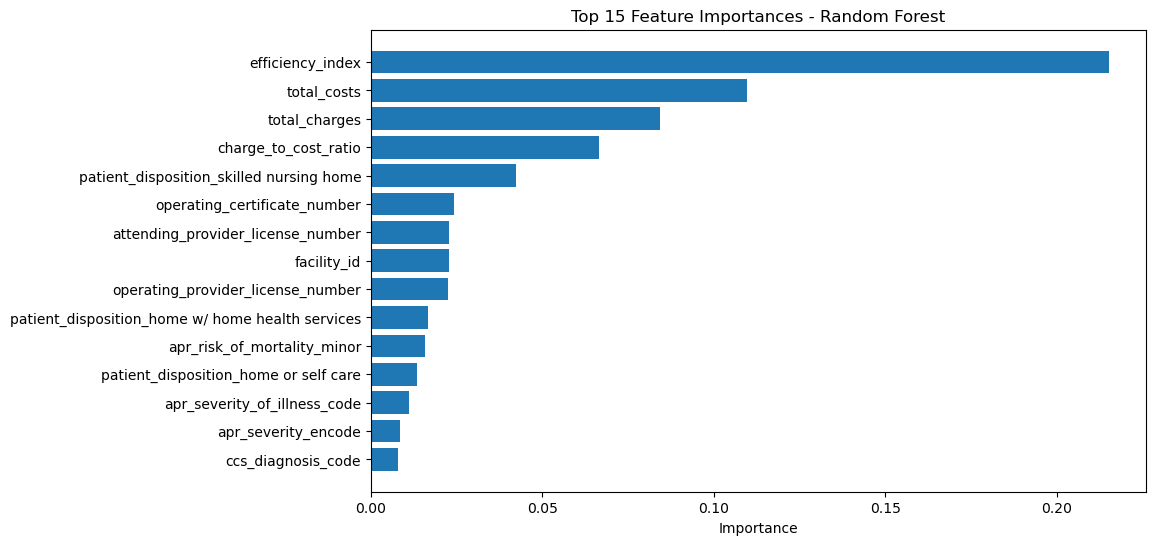

In [31]:
# FEATURE IMPORTANCE WITH ENCODING
# Get feature names after encoding
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, cat_features])

# Feature importance
importances = best_rf.feature_importances_

fi_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

In [ ]:
"""
Top drivers of Length of Stay

Efficiency Index (most influential)
Total Costs
Total Charges
Charge-to-Cost Ratio
Patient Disposition (Skilled Nursing / Home Care)
Interpretation
Operational efficiency and cost-related factors strongly affect LOS
Discharge destination significantly impacts hospital stay duration
Clinical severity features have lower but meaningful influence

“Feature importance shows that operational efficiency and 
cost-related variables play a dominant role in determining 
length of stay, alongside patient discharge disposition.”

"""

In [ ]:
# Insights Summary

"""
The Random Forest model was developed to predict hospital Length 
of Stay (LOS) using operational, financial, and patient-related features. 
Initial baseline results showed extremely high performance; however, further 
analysis revealed potential overfitting. After applying hyperparameter tuning 
using RandomizedSearchCV, the tuned Random Forest achieved balanced performance 
with an R² score of 0.834, demonstrating strong predictive capability while 
maintaining better generalization.

Residual and actual-vs-predicted analysis confirm that the tuned 
model produces unbiased predictions with errors centered around zero. 
The model performs consistently across most LOS values, with slightly 
increased variance for longer hospital stays, which is expected due to 
higher clinical complexity. Feature importance analysis indicates that 
hospital efficiency, cost metrics, and patient discharge disposition 
are the most influential factors affecting length of stay.

From a business perspective, this model can assist hospitals in 
capacity planning, bed allocation, and cost optimization. By 
accurately estimating patient length of stay at admission, hospital 
administrators can improve operational efficiency, reduce overcrowding, 
and enhance patient care planning.

"""